In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

c:\Users\maitp\anaconda3\envs\PYTHON_PROJECT_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Convert to datetime type:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])


# Convert from str to list:
def convert_to_list(job_skill):
    if isinstance(job_skill, (list, type(None))):
        return job_skill
    try:
        return ast.literal_eval(job_skill)
    except ValueError:
        return job_skill


df["job_skills"] = df["job_skills"].apply(convert_to_list)

In [4]:
# Explode [job_skills] --> explode() vs unstack() vs melt()
df_explode = df.explode("job_skills")
skills_count = df_explode.groupby(["job_title_short", "job_skills"])[
    "job_skills"  # size() is an alternative
].value_counts()
skills_count = skills_count.reset_index(name="skill_count").sort_values(
    "skill_count", ascending=False
)
skills_count.head(10)

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
494,Data Analyst,excel,66860
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
1070,Data Scientist,r,59566
590,Data Analyst,python,57190


In [5]:
job_title = "Data Engineer"
top_skills = 10
top_skills_count = skills_count.loc[skills_count["job_title_short"] == job_title].head(
    top_skills
)
top_skills_count

,job_title_short,job_skills,skill_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


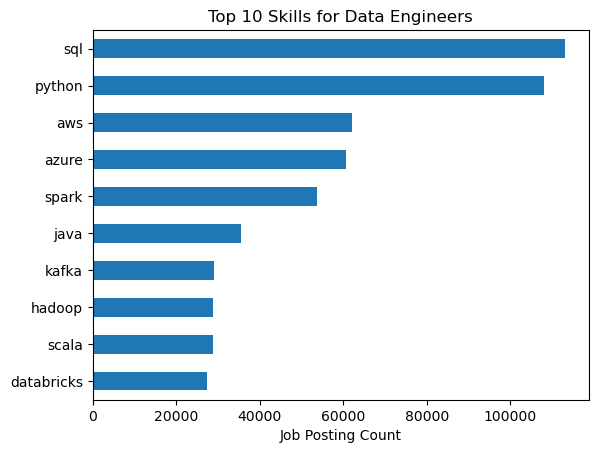

In [6]:
top_skills_count.plot(
    kind="barh",
    x="job_skills",
    y="skill_count",
    xlabel="Job Posting Count",
    ylabel="",
    legend=None,
    title=f"Top {top_skills} Skills for {job_title}s",
)
plt.gca().invert_yaxis()